# Importando bibliotecas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit   # para ajuste das curvas dos modelos

In [2]:
# inclui funções para fitar curvas:
import sys
sys.path.insert(0,'/dados/github/projetos/recrutabilidade')
import modelos as m

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
pasta_figuras_texto = '/mnt/hdsda3/arquivos/Recrutamento/figuras/texto/'

# Lendo dados

In [5]:
dados_ct_df = pd.read_pickle('./dados_ct.pkl')
dados_ct_df

,Animal,Pressure,PEEPs,CT Volume,Volume (Luva),Estimated TLC,Estimated K,CT_Volume (rec),Pressure (rec),CT folders,CT folders (rec)
0,mra26,"[10.25, 30.463, 45]","[10, 30, 45]","[458.40117130279543, 1406.1211183943176, 1969....","[1367.135, 1944.058, 2571.724]",2622.866589,0.030899,"[0, 1373.4339242285157, 1969.8752383276367]","[0, 24, 45]",[/mnt/hdsda3/arquivos/Recrutamento/CT_data_org...,[/mnt/hdsda3/arquivos/Recrutamento/CT_data_org...
1,mra28,"[10.022, 20.012, 25.478, 29.956, 45]","[10, 20, 25, 30, 45]","[539.5733922408295, 866.4519947195436, 1110.76...","[1283.233, 1660.177, 1847.163, 2051.841, 2076....",2105.897077,0.044662,"[0, 1384.9271159648897, 1823.6774616718296]","[0, 24, 45]",[/mnt/hdsda3/arquivos/Recrutamento/CT_data_org...,[/mnt/hdsda3/arquivos/Recrutamento/CT_data_org...
2,mra29,"[10.261, 20.03, 25.017, 30.088, 45]","[10, 20, 25, 30, 45]","[531.2288735389709, 913.2518694877624, 1203.89...","[1500.447, 1878.034, 2151.105, 2277.27, 2840.79]",2205.711869,0.059637,"[0, 1678.5440254211426, 2055.0341540813447]","[0, 24, 45]",[/mnt/hdsda3/arquivos/Recrutamento/CT_data_org...,[/mnt/hdsda3/arquivos/Recrutamento/CT_data_org...
3,mra31,"[10.3, 19.9, 25.0, 30.2, 45]","[10, 20, 25, 30, 45]","[522.4210849511719, 813.26760046875, 890.02122...","[1402.213, 1627.787, 1843.926, 1883.24, 2600.757]",1974.387706,0.061925,"[0, 1527.71957296875, 1852.7079208886719]","[0, 24, 45]",[/mnt/hdsda3/arquivos/Recrutamento/CT_data_org...,[/mnt/hdsda3/arquivos/Recrutamento/CT_data_org...
4,mra32,"[10.629, 20.37, 30.625, 45]","[10, 20, 30, 45]","[235.01175971031188, 463.5827505111694, 717.64...","[1166.805, 1320.169, 1577.04, 1738.76]",1440.162084,0.047636,"[0, 981.0712067604064, 1271.3319202423095]","[0, 24, 45]",[/mnt/hdsda3/arquivos/Recrutamento/CT_data_org...,[/mnt/hdsda3/arquivos/Recrutamento/CT_data_org...
5,mra33,"[10.304, 20.077, 25.025, 30.11, 45]","[10, 20, 25, 30, 45]","[401.59618649276734, 753.2439028810883, 1074.5...","[1389.504, 1681.394, 1921.372, 2127.672, 2858....",2154.565033,0.063430,"[0, 1684.4333432958988, 2030.4792702575683]","[0, 24, 45]",[/mnt/hdsda3/arquivos/Recrutamento/CT_data_org...,[/mnt/hdsda3/arquivos/Recrutamento/CT_data_org...
6,mra34,"[10.135, 20.002, 24.964, 30.004, 45]","[10, 20, 25, 30, 45]","[625.3166032908058, 952.6763394393921, 1109.27...","[1842.395, 2087.933, 2239.428, 2410.902, 3126....",2211.231284,0.054432,"[0, 1612.423954714756, 2020.3082057697106]","[0, 24, 45]",[/mnt/hdsda3/arquivos/Recrutamento/CT_data_org...,[/mnt/hdsda3/arquivos/Recrutamento/CT_data_org...


# Gerando gráficos

## Comparando volume de ar (CT x Luva)

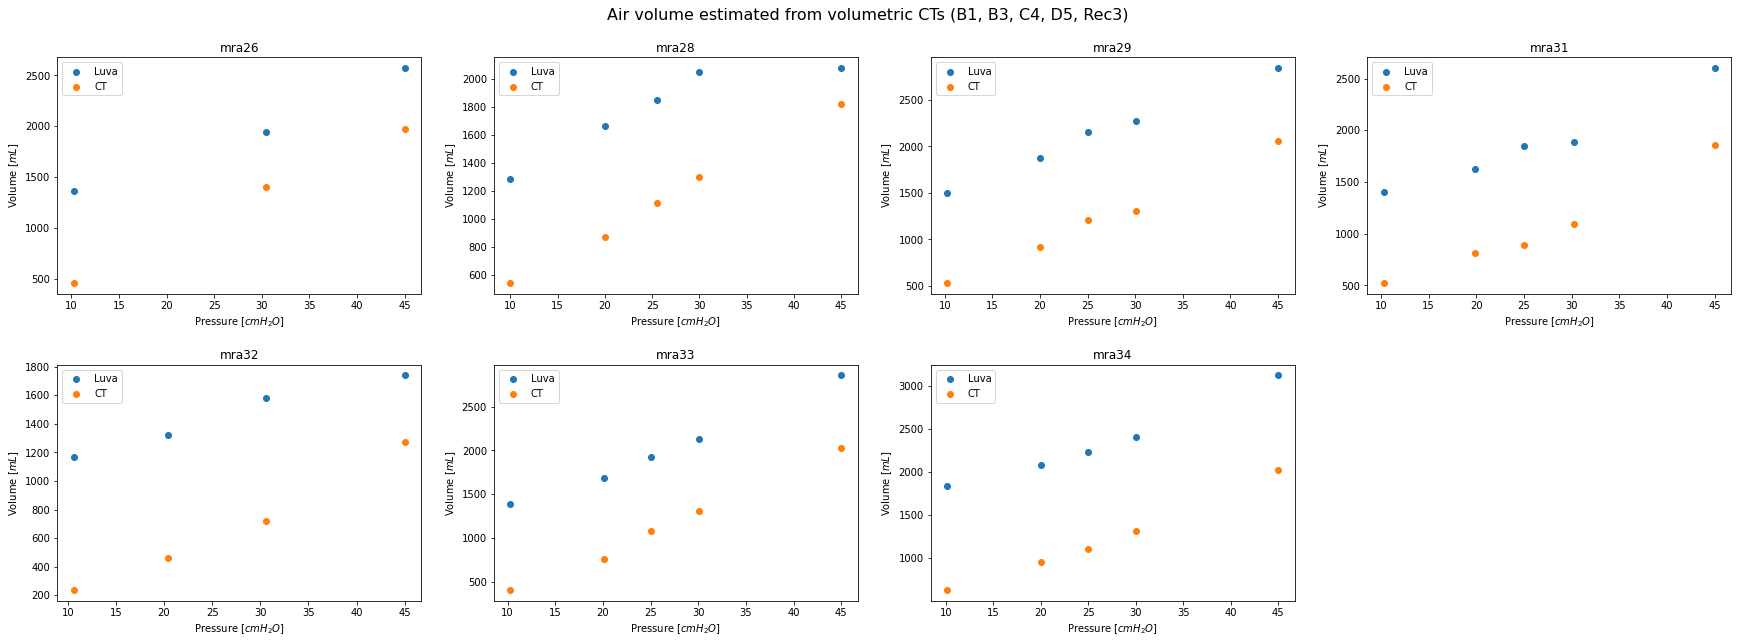

In [6]:
plt.subplots(figsize=(30, 10))
for idx in range(len(dados_ct_df)):
    p = dados_ct_df.iloc[idx]['Pressure']
    v = dados_ct_df.iloc[idx]['CT Volume']
    v_luva = dados_ct_df.iloc[idx]['Volume (Luva)']
    plt.subplot(2,4,idx+1)
    plt.scatter(p, v_luva,label='Luva')
    plt.scatter(p, v,label='CT')
    #plt.scatter([0], [0],label='(0,0)')
    plt.legend()
    plt.xlabel('Pressure [$cmH_2O$]')
    plt.ylabel('Volume [$mL$]')
    plt.title(dados_ct_df.iloc[idx]['Animal'])
    plt.suptitle('Air volume estimated from volumetric CTs (B1, B3, C4, D5, Rec3)', fontsize=16, y=0.95)
    plt.subplots_adjust(hspace=0.3, wspace=0.2) # plt.subplots_adjust(hspace=0.4, wspace=0.4)

## CT vol x press

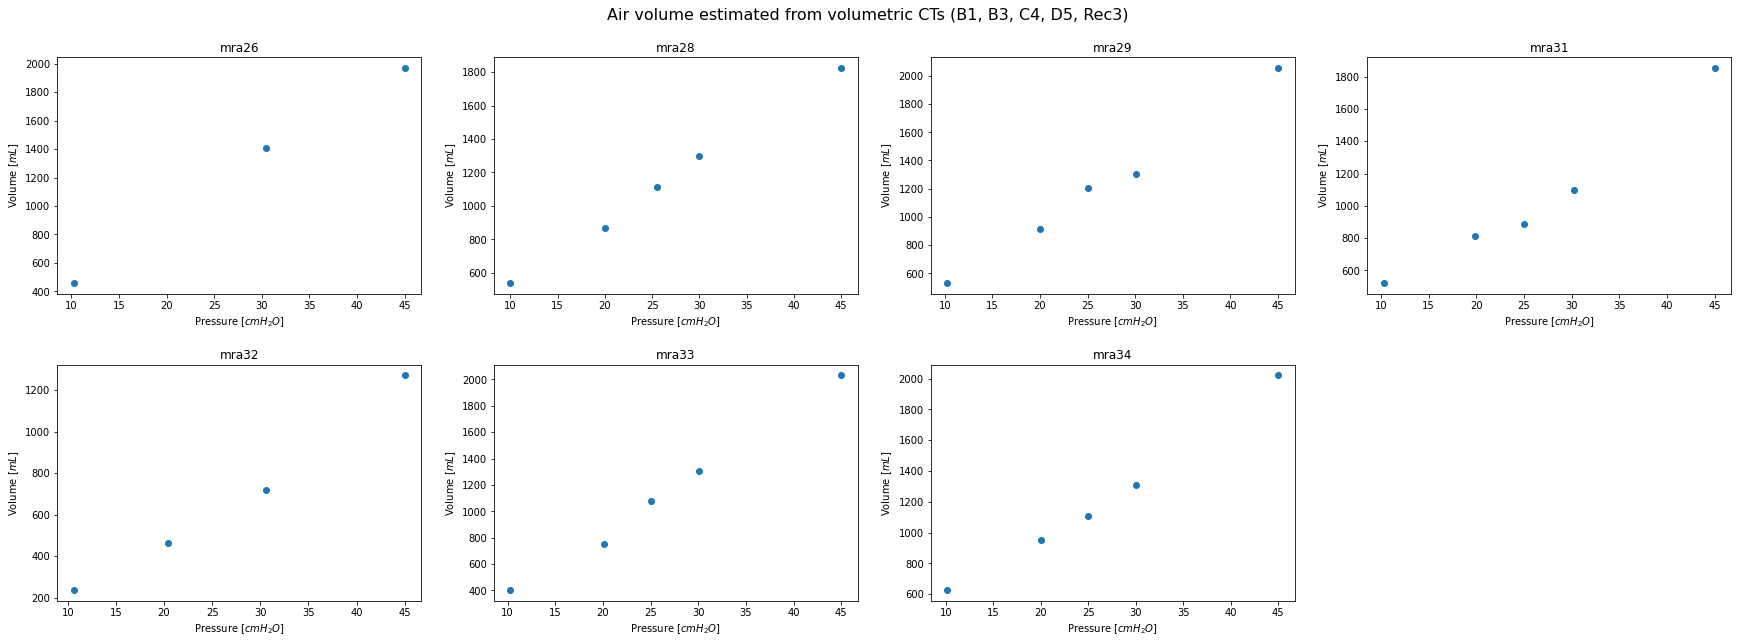

In [19]:
plt.subplots(figsize=(30, 10))
for idx in range(len(dados_ct_df)):
    p = dados_ct_df.iloc[idx]['Pressure']
    v = dados_ct_df.iloc[idx]['CT Volume']
    plt.subplot(2,4,idx+1)
    plt.scatter(p, v,label='CT')
    #plt.scatter([0], [0],label='(0,0)')
    #plt.legend()
    #plt.ylim((-50,max(v)*1.1))
    plt.xlabel('Pressure [$cmH_2O$]')
    plt.ylabel('Volume [$mL$]')
    plt.title(dados_ct_df.iloc[idx]['Animal'])
    plt.suptitle('Air volume estimated from volumetric CTs (B1, B3, C4, D5, Rec3)', fontsize=16, y=0.95)
    #plt.tight_layout()
    plt.subplots_adjust(hspace=0.3, wspace=0.2) # plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.savefig(pasta_figuras_texto+'volumes_cts_passos.pdf',bbox_inches='tight')

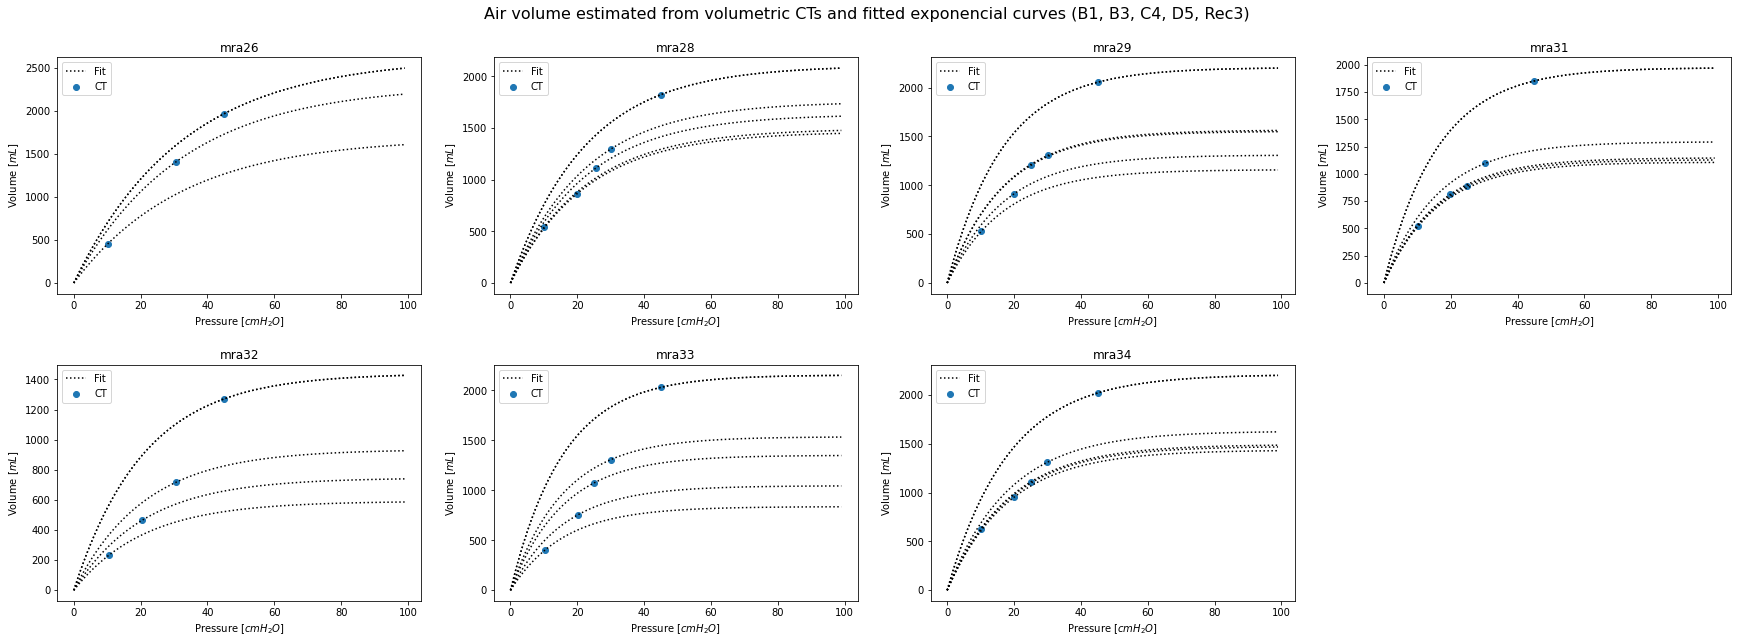

In [21]:
plt.subplots(figsize=(30, 10))
for idx in range(len(dados_ct_df)):
    fator_K = 1.0
    p = dados_ct_df.iloc[idx]['Pressure']
    v = dados_ct_df.iloc[idx]['CT Volume']
    
    p_fit = range(0,100)
    v_fit = m.expsalazar(p_fit, dados_ct_df.iloc[idx]['Estimated TLC'],dados_ct_df.iloc[idx]['Estimated K']*fator_K)
    
    
    plt.subplot(2,4,idx+1)
    plt.scatter(p, v,label='CT')
    plt.plot(p_fit, v_fit, 'k:', label='Fit')
    
    K = dados_ct_df.iloc[idx]['Estimated K']*fator_K
    for ponto in range(len(p)):
        pressoes = [0, p[ponto]]
        volumes = [0, v[ponto]]
        popt,pcov = curve_fit(lambda x, volumes: m.expsalazar(x, volumes, K), pressoes, volumes) # fit fixando K
        v_fit = m.expsalazar(p_fit, popt[0] ,K)
        plt.plot(p_fit, v_fit, 'k:')
    
    plt.legend()
    plt.xlabel('Pressure [$cmH_2O$]')
    plt.ylabel('Volume [$mL$]')
    plt.title(dados_ct_df.iloc[idx]['Animal'])
    plt.suptitle('Air volume estimated from volumetric CTs and fitted exponencial curves (B1, B3, C4, D5, Rec3)', fontsize=16, y=0.95)
    plt.subplots_adjust(hspace=0.3, wspace=0.2) # plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.savefig(pasta_figuras_texto+'volumes_cts_passos_fit.pdf',bbox_inches='tight')

## Estimando TLC

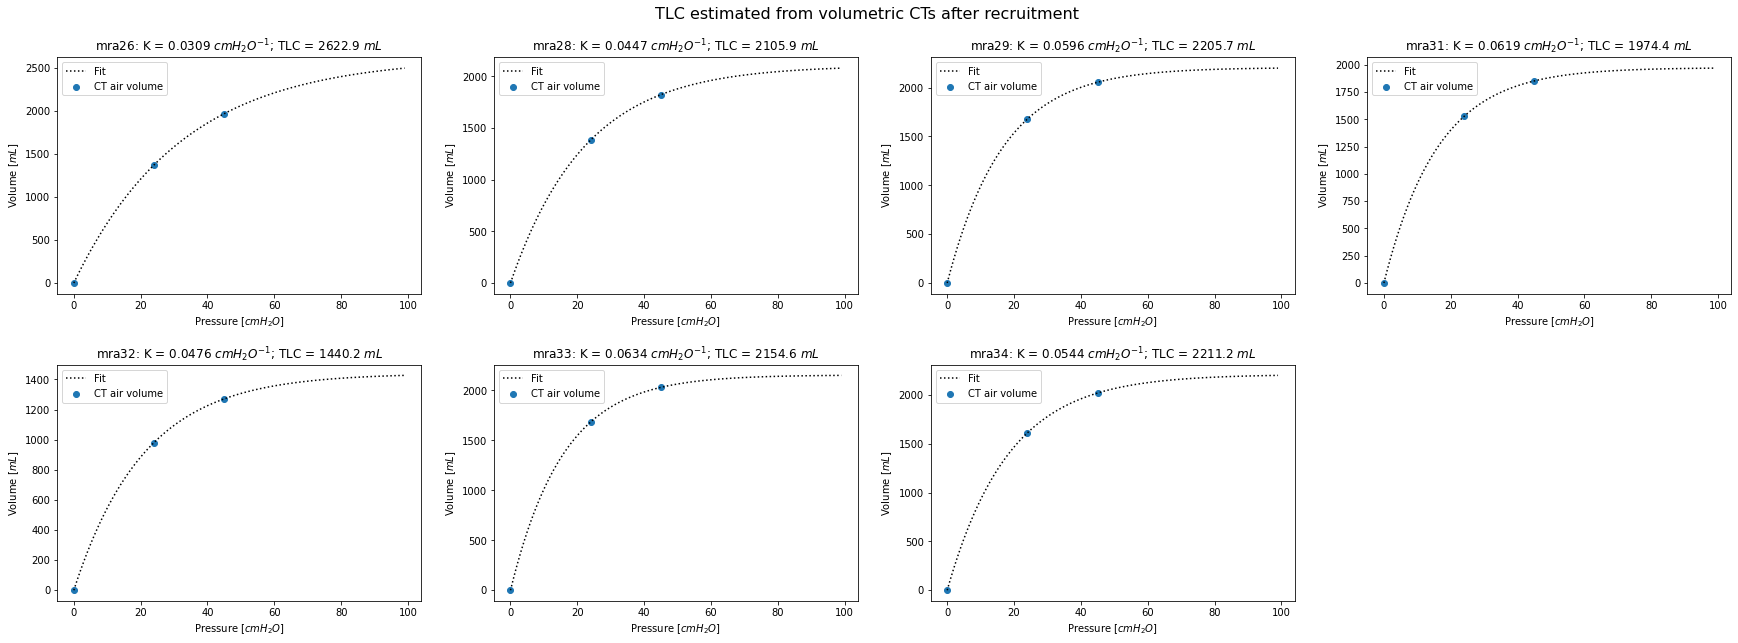

In [18]:
# TLC já estimada anteriormente... apenas plotando o resultado...
plt.subplots(figsize=(30, 10))
for idx in range(len(dados_ct_df)):
    p = dados_ct_df.iloc[idx]['Pressure (rec)']
    v = dados_ct_df.iloc[idx]['CT_Volume (rec)']
    
    p_fit = range(0,100)
    v_fit = m.expsalazar(p_fit, dados_ct_df.iloc[idx]['Estimated TLC'],dados_ct_df.iloc[idx]['Estimated K'])
    
    
    plt.subplot(2,4,idx+1)
    plt.scatter(p, v,label='CT air volume')
    plt.plot(p_fit, v_fit, 'k:', label='Fit')
    plt.legend()
    plt.xlabel('Pressure [$cmH_2O$]')
    plt.ylabel('Volume [$mL$]')
    unid = r'$cmH_2O^{-1}$'
    plt.title(f'{dados_ct_df.iloc[idx]["Animal"]}: K = {dados_ct_df.iloc[idx]["Estimated K"]:.4f} {unid}; TLC = {dados_ct_df.iloc[idx]["Estimated TLC"]:.1f} $mL$')
    plt.suptitle('TLC estimated from volumetric CTs after recruitment', fontsize=16, y=0.95)
    plt.subplots_adjust(hspace=0.3, wspace=0.2) # plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.savefig(pasta_figuras_texto+'tlc_estimado_cts.pdf',bbox_inches='tight')

In [10]:
dados_ct_df.head(2)

,Animal,Pressure,PEEPs,CT Volume,Volume (Luva),Estimated TLC,Estimated K,CT_Volume (rec),Pressure (rec),CT folders,CT folders (rec)
0,mra26,"[10.25, 30.463, 45]","[10, 30, 45]","[458.40117130279543, 1406.1211183943176, 1969....","[1367.135, 1944.058, 2571.724]",2622.866589,0.030899,"[0, 1373.4339242285157, 1969.8752383276367]","[0, 24, 45]",[/mnt/hdsda3/arquivos/Recrutamento/CT_data_org...,[/mnt/hdsda3/arquivos/Recrutamento/CT_data_org...
1,mra28,"[10.022, 20.012, 25.478, 29.956, 45]","[10, 20, 25, 30, 45]","[539.5733922408295, 866.4519947195436, 1110.76...","[1283.233, 1660.177, 1847.163, 2051.841, 2076....",2105.897077,0.044662,"[0, 1384.9271159648897, 1823.6774616718296]","[0, 24, 45]",[/mnt/hdsda3/arquivos/Recrutamento/CT_data_org...,[/mnt/hdsda3/arquivos/Recrutamento/CT_data_org...


In [11]:
def recruit_percentage(ser):
    TLC = ser['Estimated TLC']
    K = ser['Estimated K']
    
    p = ser['Pressure']
    v = ser['CT Volume']
    
    v_recruited = []
    
    for ponto in range(len(p)):
        pressoes = [0, p[ponto]]
        volumes = [0, v[ponto]]
        popt,pcov = curve_fit(lambda x, volumes: m.expsalazar(x, volumes, K), pressoes, volumes) # fit fixando K
        v_recruited.append(popt[0])
        
    rec_percentage = np.array(v_recruited)/TLC
    rec_potential = 1-rec_percentage
        
    return rec_percentage, rec_potential
        

In [12]:
dados_ct_df[['Recruited percentage', 'Recruitment potential']] = dados_ct_df.apply(lambda ser: recruit_percentage(ser), axis=1, result_type='expand')

In [13]:
dados_ct_df.head(2)

,Animal,Pressure,PEEPs,CT Volume,Volume (Luva),Estimated TLC,Estimated K,CT_Volume (rec),Pressure (rec),CT folders,CT folders (rec),Recruited percentage,Recruitment potential
0,mra26,"[10.25, 30.463, 45]","[10, 30, 45]","[458.40117130279543, 1406.1211183943176, 1969....","[1367.135, 1944.058, 2571.724]",2622.866589,0.030899,"[0, 1373.4339242285157, 1969.8752383276367]","[0, 24, 45]",[/mnt/hdsda3/arquivos/Recrutamento/CT_data_org...,[/mnt/hdsda3/arquivos/Recrutamento/CT_data_org...,"[0.643813701832913, 0.8790390987449902, 1.0]","[0.356186298167087, 0.1209609012550098, 0.0]"
1,mra28,"[10.022, 20.012, 25.478, 29.956, 45]","[10, 20, 25, 30, 45]","[539.5733922408295, 866.4519947195436, 1110.76...","[1283.233, 1660.177, 1847.163, 2051.841, 2076....",2105.897077,0.044662,"[0, 1384.9271159648897, 1823.6774616718296]","[0, 24, 45]",[/mnt/hdsda3/arquivos/Recrutamento/CT_data_org...,[/mnt/hdsda3/arquivos/Recrutamento/CT_data_org...,"[0.7100573864189281, 0.6963000970507911, 0.776...","[0.2899426135810719, 0.3036999029492089, 0.223..."


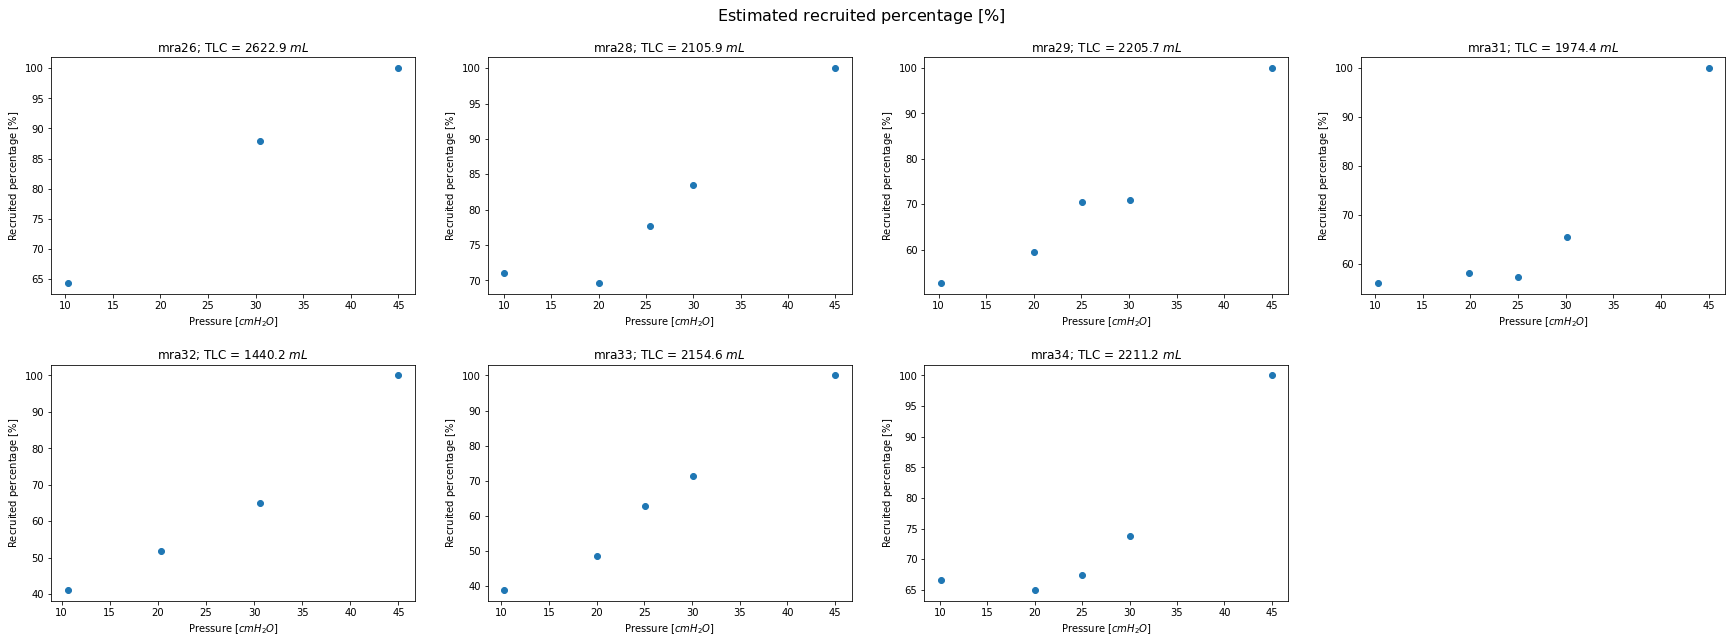

In [22]:
plt.subplots(figsize=(30, 10))
for idx in range(len(dados_ct_df)):
    p = dados_ct_df.iloc[idx]['Pressure']
    r = dados_ct_df.iloc[idx]['Recruited percentage']
    
    
    plt.subplot(2,4,idx+1)
    plt.scatter(p, r*100,label='Recruited percentage')
    #plt.legend()
    plt.xlabel('Pressure [$cmH_2O$]')
    plt.ylabel('Recruited percentage [$\%$]')
    plt.title(f'{dados_ct_df.iloc[idx]["Animal"]}; TLC = {dados_ct_df.iloc[idx]["Estimated TLC"]:.1f} $mL$')
    plt.suptitle('Estimated recruited percentage [$\%$]', fontsize=16, y=0.95)
    plt.subplots_adjust(hspace=0.3, wspace=0.2) # plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.savefig(pasta_figuras_texto+'cts_recruit_percent.pdf',bbox_inches='tight')

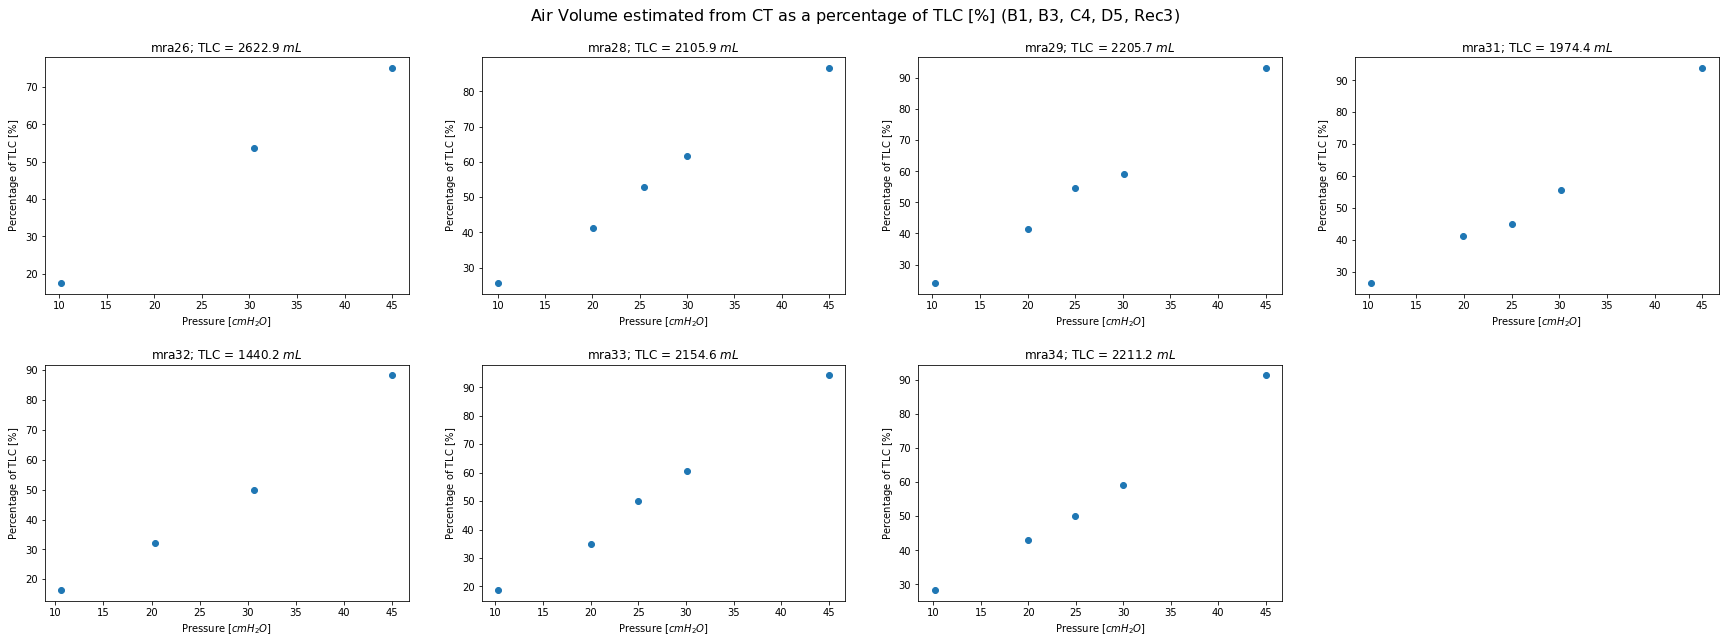

In [20]:
plt.subplots(figsize=(30, 10))
for idx in range(len(dados_ct_df)):
    p = dados_ct_df.iloc[idx]['Pressure']
    v = dados_ct_df.iloc[idx]['CT Volume']
    TLC = dados_ct_df.iloc[idx]["Estimated TLC"]
    
    vperc = np.array(v)/TLC
    
    
    plt.subplot(2,4,idx+1)
    plt.scatter(p, vperc*100,label='air volume percentage')
    #plt.legend()
    plt.xlabel('Pressure [$cmH_2O$]')
    plt.ylabel('Percentage of TLC [$\%$]')
    plt.title(f'{dados_ct_df.iloc[idx]["Animal"]}; TLC = {TLC:.1f} $mL$')
    plt.suptitle('Air Volume estimated from CT as a percentage of TLC [$\%$] (B1, B3, C4, D5, Rec3)', fontsize=16, y=0.95)
    plt.subplots_adjust(hspace=0.3, wspace=0.2) # plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.savefig(pasta_figuras_texto+'volumes_cts_percentuais_tlc.pdf',bbox_inches='tight')

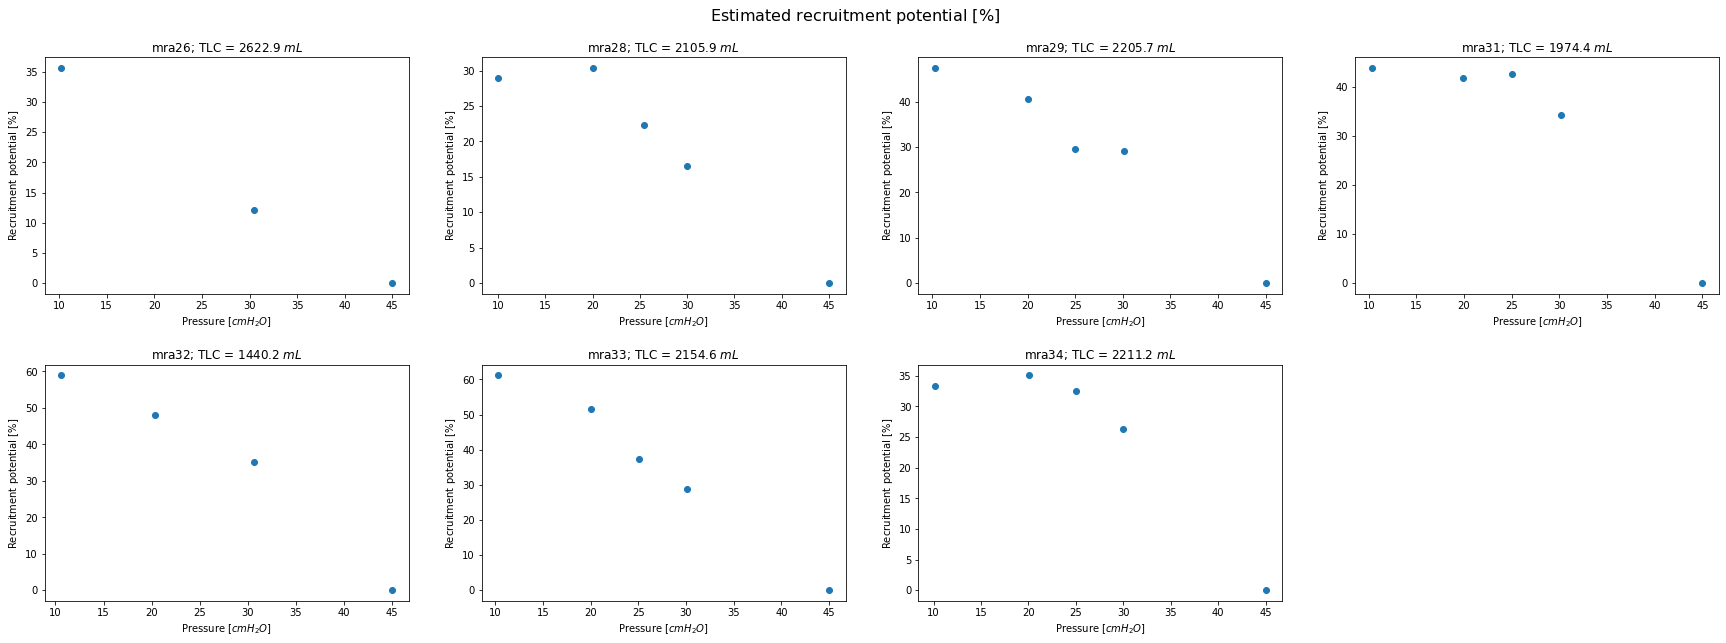

In [23]:
plt.subplots(figsize=(30, 10))
for idx in range(len(dados_ct_df)):
    p = dados_ct_df.iloc[idx]['Pressure']
    r = dados_ct_df.iloc[idx]['Recruitment potential']
    
    
    plt.subplot(2,4,idx+1)
    plt.scatter(p, r*100,label='Recruitment potential')
    #plt.legend()
    plt.xlabel('Pressure [$cmH_2O$]')
    plt.ylabel('Recruitment potential [$\%$]')
    plt.title(f'{dados_ct_df.iloc[idx]["Animal"]}; TLC = {dados_ct_df.iloc[idx]["Estimated TLC"]:.1f} $mL$')
    plt.suptitle('Estimated recruitment potential [$\%$]', fontsize=16, y=0.95)
    plt.subplots_adjust(hspace=0.3, wspace=0.2) # plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.savefig(pasta_figuras_texto+'cts_recruit_potential.pdf',bbox_inches='tight')

In [17]:
# gravando resultados
dados_ct_df.to_pickle('./dados_ct_completo.pkl')